# Lab 4 - KNN

-----------------------------------------------------------------------

Author: Kevin Paganini    
Date: 9/28/2022    
Description: Were doing the knn thing... 
In this lab we implemented KNN in numpy. Furthermore, I used sklearn to implement an estimator class of KNN plus a pipeline to make predictions. We then plotted the decision boundaries of each knn classifier and showed non linear decision boundaries. In the last problem we did a hyperparameter search by hand as well as using sklearns gridsearchcv method. For the sweep dataset 40 neighbors was the optimal amount of neighbors found.  



## Reflection Questions
### KNN Implementation (Problem 1)
1. Estimate the run time complexity in big-o notation of training a KNN model. Justify your answer.
- There really is no training it is just the model saving the points, so it is O(1).

2. Estimate the run time complexity in big-o notation of predicting the output value for a query point using a training set of N points, with p features, and k neighbors with a KNN model. Justify your answer.
- O(n) to find the distances of each point to the query point. Then I have an argsort method that is O(n\*log(n)). Then selecting the shortest distances and voting is an O(1) operation. So overall we have a O(n + n\*log(n)).
3. What do you think the potential downsides of the k nearest neighbors algorithm are? Why do you think it might not be used as widely as other methods?
- Inference takes a long time.
- Outliers are very difficult to take into account.
- Cannot handle missing values.
- Once feature space is high dimensional, you will need a lot a lot of samples. 
- Categorical features do not work well. We would need to some data preprocessing.

### Decision Boundaries (Problem 2)
1. For each of the three data sets, do you think a linear decision boundary could be used to accurately classify the data points?
- A linear decision boundary would not work for the first data set, because it is a circle. There is no way to put a line through the data to seperate the classes.
- A linear decision boundary would not be very accurate in the second data set, because you cannot put a line through the data to seperate the classes. It would do better than the first data set however.
- A linear decision boundary would not be too bad on the last data set. One can classify most points correctly drawing a linear decision boundary to split the classes.
- Circle would be worst, than moon than rocky.
2. What do we mean by a "non-linear" decision boundary? Give an example of a non-linear function that could be used as a decision boundary for one of the data sets.
- A non-linear decision boundary is a boundary between two classes that is not a straight line. In other words, one cannot simply draw a line between the two classes to distinguish them. In the circle dataset one could use a circular decision    
    boundary to split the two classes.
3. What are the advantages of non-linear decision boundaries over linear decision boundaries? What are the disadvantages?
- Advantages of linear decision boundaries is that they are simple. This makes them easily interpretable as well as very fast to compute. However this model can suffer from bias, because it may be too simple.
- Non-linear decision boundaries can make predictions on linear data. These models can have high variance and tend to overfit data. 
### Choosing an Optimal Value for k (Problem 3)
1. What value of k gave the highest accuracy?
- k = 40
2. For large values of k, what happened to the accuracy? Why do you think this is?
- The accuracy stayed consistent for k values higher than 110 at around 78%. This is because when a lot of data points are taken into consideration it approximates the mean of the data. Basically you are returning the mean of the data at this point.   
    I am guessing a good rule of thumb is to select a k that is 50% of the entire data set or less, to avoid taking the mean unless thats something that proves to be useful, but at that point why use knn when you can use a mean calculation.
3. Let's say that we ask you to use the following experimental setup to find a value of k that maximizes the accuracy of the model's predictions: split the data set into training and testing sets, train a model for each value of k using the training set, predictions the classes of the testing points, and evaluate the accuracy of the predictions. Could this approach give you misleading results? If so, why?
- Since we are splitting the data set into training and testing at the beginning of this process, we should have results that provide actual insights. This is what happens when we use k-folds. We are always leaving a certain percentage of the training data out and    testing on that part. This can tell us if our model will generalize or not. 
4. It is considered a "best practice" to use cross-fold validation when optimizing parameters. Why do you think that is?
- K-Folds can help tell us whether a model will generalize or not. Since we split the data into k subsets and test on one subset of the data and train on the others, we can get a good idea if the model can generalize, because each time it is training on a different subset. The model cannot rely on memorizing data and needs to "learn".

### Setup and imports




In [60]:
from knn import KNN
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy import spatial
from scipy import stats
from scipy import mean
from matplotlib import pyplot as plt

circle_path = os.path.join("Data", "circles.csv")
moon_path = os.path.join("Data", "moons.csv")
rocky_path = os.path.join("Data", "rocky_ridge.csv")
sweep_path = os.path.join("Data", "sweep.csv")

circle = pd.read_csv(circle_path)
moon = pd.read_csv(moon_path)
rocky = pd.read_csv(rocky_path)
sweep = pd.read_csv(sweep_path)

rocky.head()

,label,x,y
0,1,-0.177497,0.930496
1,0,1.977424,1.766155
2,0,1.800024,1.700343
3,1,-0.770837,2.359163
4,1,-0.308009,1.594063


In [61]:
## Helper function to make figures look pretty

def make_pretty(ax, title, x_label, y_label):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    return ax

### Making sklearn KNN class

knn.py also works and was tested out. The Sklearn implementation uses all the same functions as the knn.py version


In [62]:
from sklearn.base import BaseEstimator

class KNN_kev(BaseEstimator):
    def __init__(self, aggregation_function='mode', k=None):
        self.aggregation_function = aggregation_function
        self.k = k
        
    def fit(self, X, y=None):
        self.X = X
        self.y = y
        
    def predict(self, X):
        distances = spatial.distance.cdist(X, self.X)
        sorted_indexes = np.argsort(distances, axis=1).transpose()[:self.k].transpose() 
        targets = self.y[sorted_indexes] 
        if self.aggregation_function == 'mode':
            return stats.mode(targets, axis=1, keepdims=False)[0]
        else:
            return np.mean(targets, axis=1)
    def fit_predict(self, X, y):
        self.fit(self.X, self.y)
        return self.predict(X)

## Explore Decision boundaries for 3 Datasets

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipelines are the way to go in sklearn
circle_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('knn', KNN_kev(k=3, aggregation_function='mode'))
])
moon_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('knn', KNN_kev(k=3, aggregation_function='mode'))
])

rocky_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('knn', KNN_kev(k=3, aggregation_function='mode'))
])


## Data Splitting

In [64]:
from sklearn.model_selection import train_test_split

train_X_circle, test_X_circle, train_y_circle, test_y_circle = \
    train_test_split(circle[['x', 'y']], circle[['label']], random_state=42, test_size=0.33)
train_X_moon, test_X_moon, train_y_moon, test_y_moon = \
    train_test_split(moon[['x', 'y']], moon[['label']], random_state=42, test_size=0.33)
train_X_rocky, test_X_rocky, train_y_rocky, test_y_rocky = \
    train_test_split(rocky[['x', 'y']], rocky[['label']], random_state=42, test_size=0.33)

## Transforming and predicting on dataset

In [65]:

# This was making sure the KNN_kev model works properly
#lit = KNN_kev('mode', 3)
# print(type(train_X_moon))
# lit.fit(train_X_moon.values, train_y_moon.values)
# lit.predict(train_X_moon.values)

# Now we can use the pipes
circle_pipe.fit(train_X_circle.values, train_y_circle.values)
circle_pred = circle_pipe.predict(train_X_circle.values)

moon_pipe.fit(train_X_moon.values, train_y_moon.values)
moon_pred = moon_pipe.predict(train_X_moon.values)

rocky_pipe.fit(train_X_rocky.values, train_y_rocky.values)
rocky_pred = rocky_pipe.predict(train_X_rocky.values)

## Making predictions on 2D grid

In [66]:
x_mesh = np.linspace(-3, 3, num=301)

y_mesh = np.linspace(-3, 3, num=301)

x_1, y_1 = np.meshgrid(x_mesh, y_mesh)
print(x_1.shape)
print(y_1.shape)
# fig, ax = plt.subplots(figsize=(15, 10))
data = np.hstack((x_1.reshape(-1,1), y_1.reshape(-1,1)))
circle_sample = circle_pipe.predict(data)
moon_sample = moon_pipe.predict(data)
rocky_sample = rocky_pipe.predict(data)


(301, 301)
(301, 301)


<AxesSubplot:title={'center':'Circle data set decision boundary plot'}, xlabel='X coord', ylabel='Y coord'>

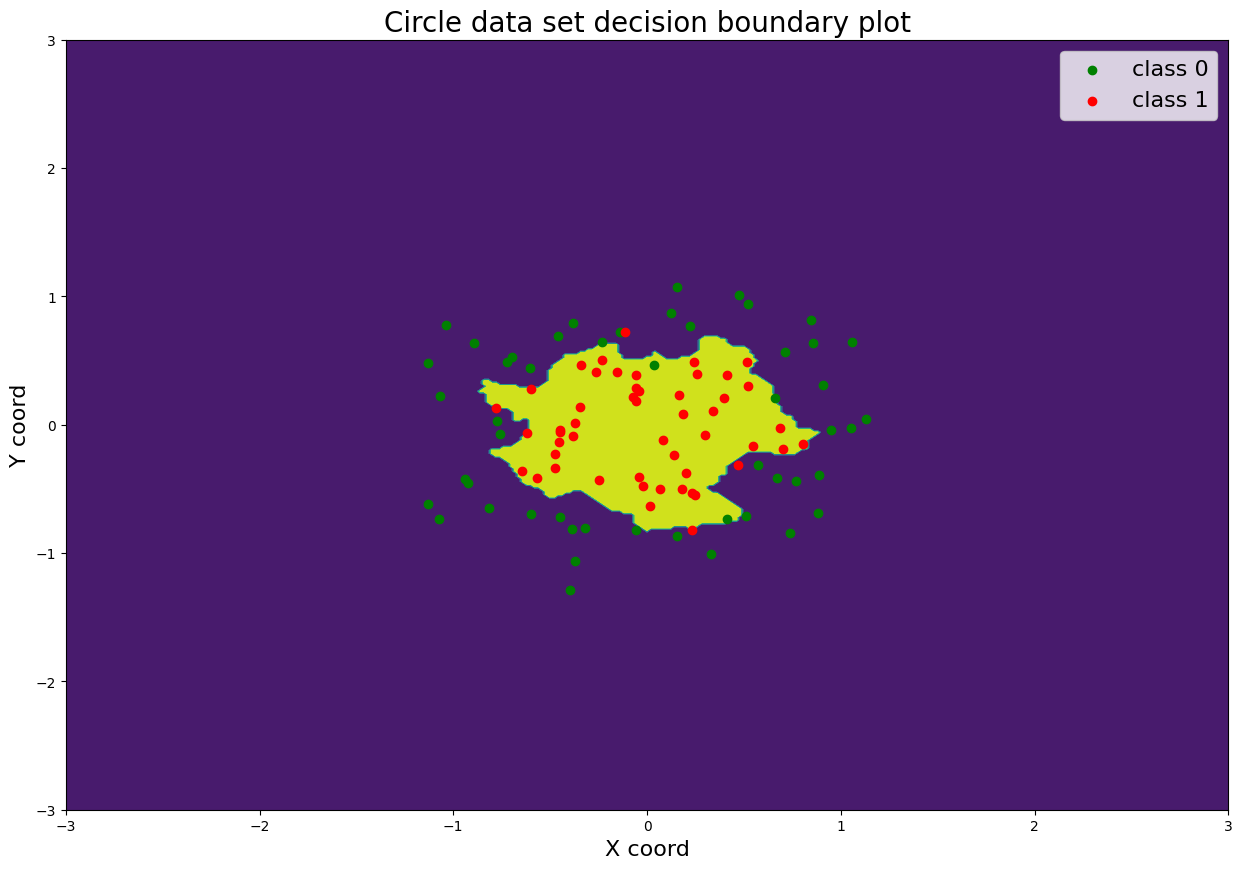

In [67]:

fig, ax = plt.subplots(figsize=(15, 10))

circle_sample = circle_sample.reshape(301, 301)

ax.contourf(x_1,y_1, circle_sample)
circle_neg = circle[circle['label'] == 0]
circle_pos = circle[circle['label'] == 1]
ax.scatter(circle_neg['x'], circle_neg['y'], color='green', label='class 0')
ax.scatter(circle_pos['x'], circle_pos['y'], color='red', label='class 1')
make_pretty(ax, "Circle data set decision boundary plot", 'X coord', 'Y coord')



<AxesSubplot:title={'center':'Moon data set decision boundary plot'}, xlabel='X coord', ylabel='Y coord'>

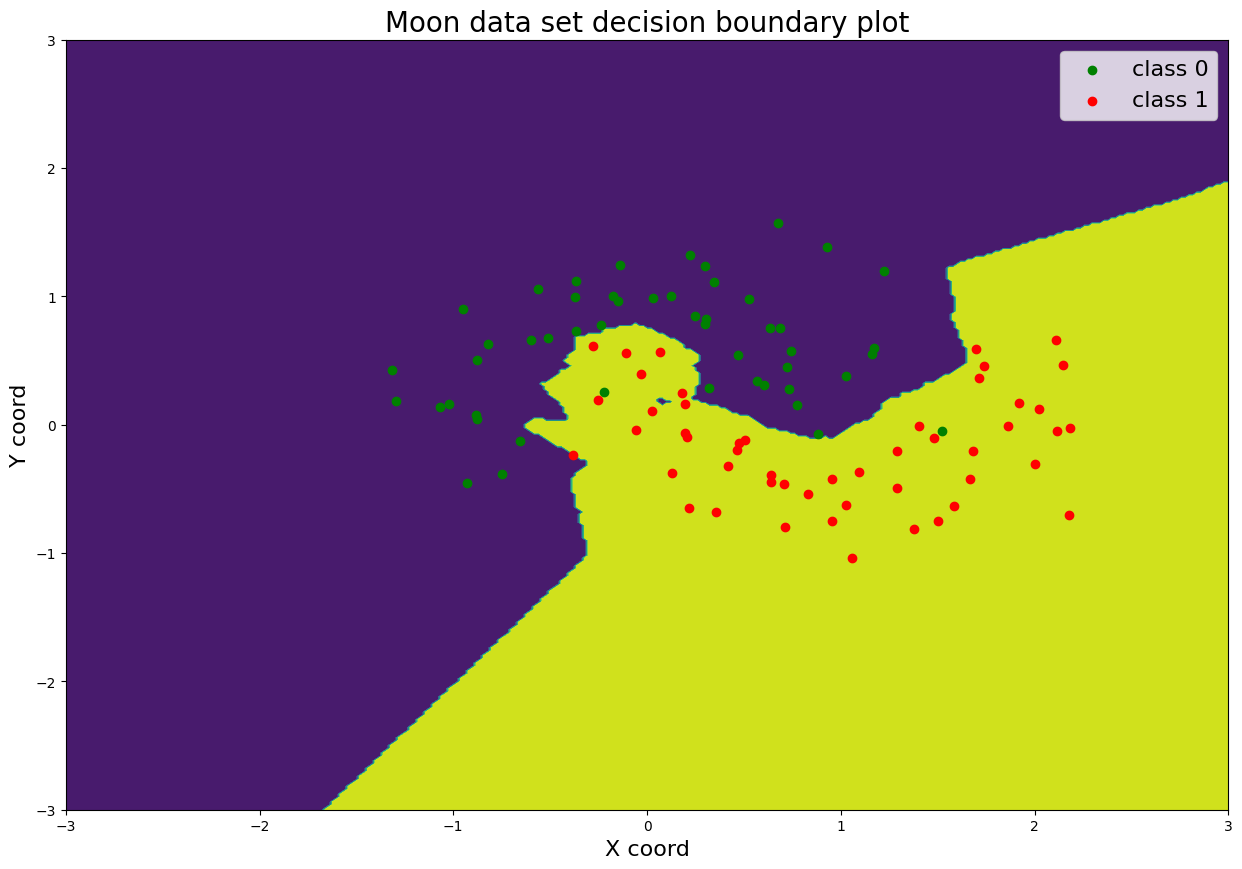

In [68]:
fig, ax = plt.subplots(figsize=(15, 10))

moon_sample = moon_sample.reshape(301, 301)

ax.contourf(x_1,y_1, moon_sample)
moon_neg = moon[moon['label'] == 0]
moon_pos = moon[moon['label'] == 1]
ax.scatter(moon_neg['x'], moon_neg['y'], color='green', label='class 0')
ax.scatter(moon_pos['x'], moon_pos['y'], color='red', label='class 1')
make_pretty(ax, "Moon data set decision boundary plot", 'X coord', 'Y coord')

(301, 301)
(301, 301)


<AxesSubplot:title={'center':'Rocky data set decision boundary plot'}, xlabel='X coord', ylabel='Y coord'>

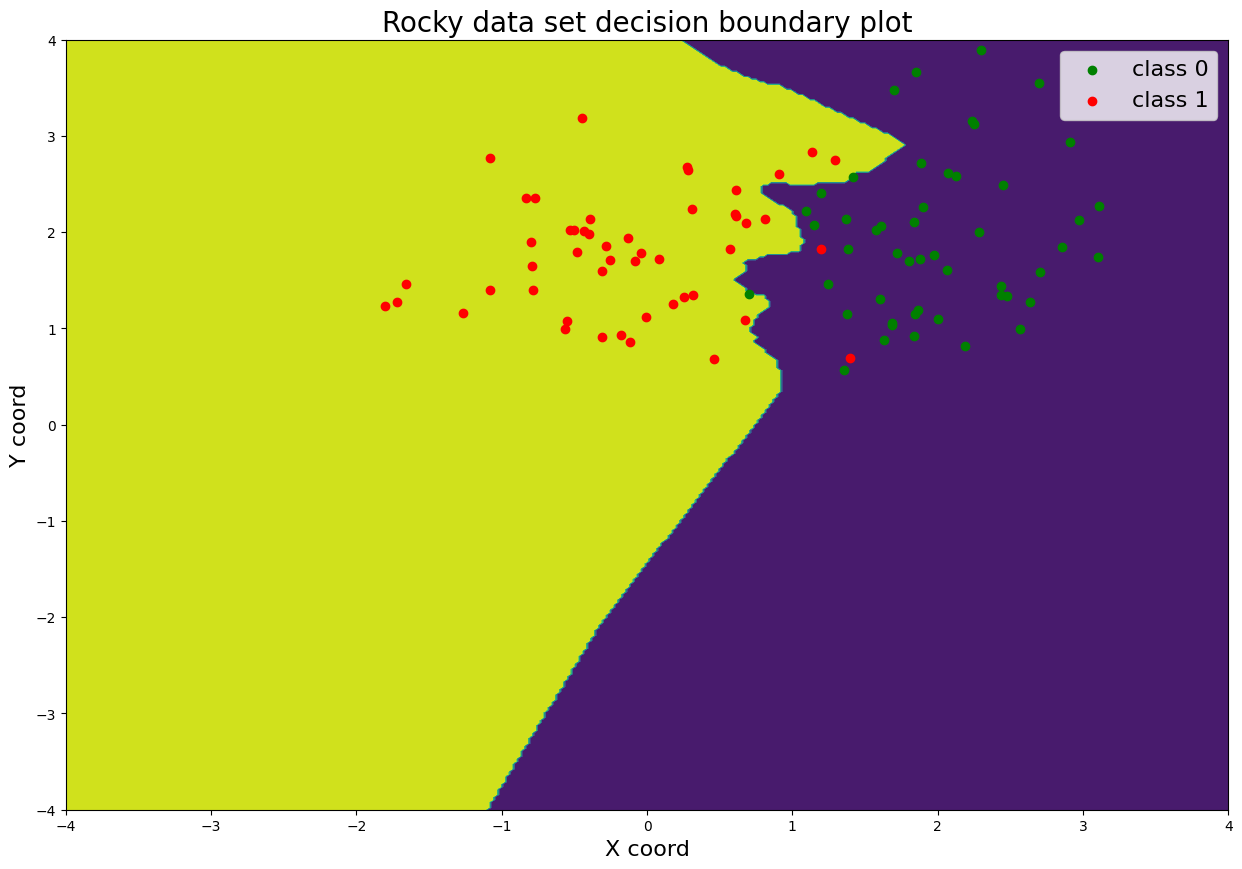

In [69]:
# Resampling over -4, 4 to color entire space
x_mesh = np.linspace(-4, 4, num=301)
y_mesh = np.linspace(-4, 4, num=301)
x_1, y_1 = np.meshgrid(x_mesh, y_mesh)
print(x_1.shape)
print(y_1.shape)
data = np.hstack((x_1.reshape(-1,1), y_1.reshape(-1,1)))
rocky_sample = rocky_pipe.predict(data)

# Making figure
fig, ax = plt.subplots(figsize=(15, 10))

rocky_sample = rocky_sample.reshape(301, 301)

ax.contourf(x_1,y_1, rocky_sample)
rocky_neg = rocky[rocky['label'] == 0]
rocky_pos = rocky[rocky['label'] == 1]
ax.scatter(rocky_neg['x'], rocky_neg['y'], color='green', label='class 0')
ax.scatter(rocky_pos['x'], rocky_pos['y'], color='red', label='class 1')
make_pretty(ax, "Rocky data set decision boundary plot", 'X coord', 'Y coord')

## Choosing an optimal k value

In [70]:
sweep = pd.read_csv(sweep_path)
sweep.head()

,labels,x,y
0,0.0,3.057563,-0.101047
1,0.0,-2.115610,2.193685
2,0.0,-1.083560,-1.091495
3,1.0,-2.210543,0.359090
4,0.0,2.533183,1.030012


## By Hand as per the prompt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean_scores:
 [0.8240000000000001, 0.8720000000000001, 0.8720000000000001, 0.8720000000000001, 0.8720000000000001, 0.8800000000000001, 0.8560000000000001, 0.8400000000000001, 0.8160000000000001, 0.8, 0.784, 0.784, 0.784, 0.784, 0.784, 0.784, 0.784, 0.784, 0.784, 0.784, 0.784]
Standard Deviation:
 [0.051224993899462785, 0.04995998398718718, 0.03487119154832542, 0.0466476151587624, 0.0466476151587624, 0.043817804600413304, 0.044542114902640186, 0.039999999999999994, 0.019595917942265388, 0.02529822128134702, 0.01959591794226544, 0.01959591794226544, 0.01959591794226544, 0.01959591794226544, 0.01959591794226544, 0.01959591794226544, 0.01959591794226544, 0.01959591794226544, 0.01959591794226544, 0.01959591794226544, 0.01959591794226544]


<AxesSubplot:title={'center':'Accuracy score with error bars vs. k value'}, xlabel='k neighbors', ylabel='accuracy score'>

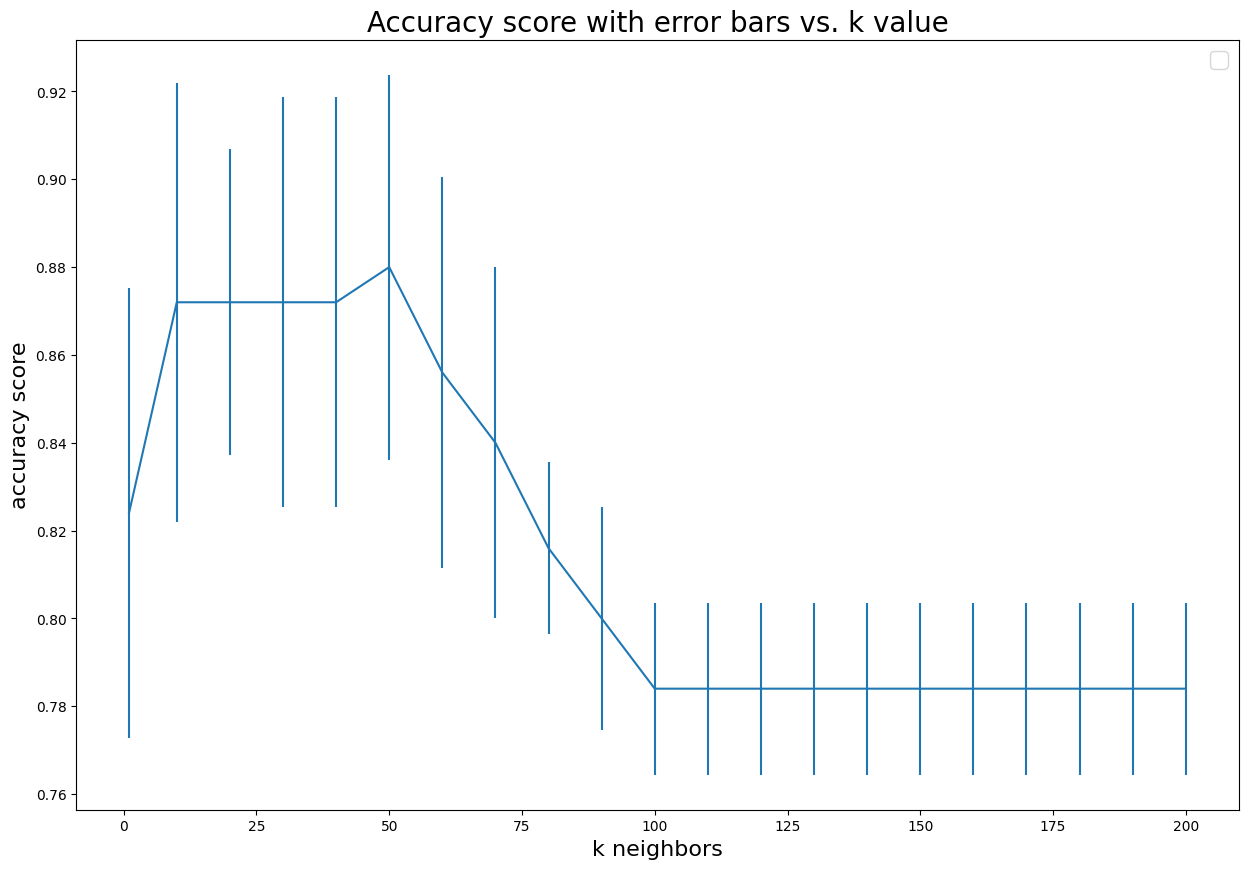

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

acc_score = {}

k_vals = np.arange(0, 201, step=10)
k_vals[0] = k_vals[0] + 1
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(sweep[['x', 'y']].values, sweep[['labels']].values.astype(int))
X = sweep[['x', 'y']].values
y = sweep[['labels']].values.astype(int)
for train_index, test_index in skf.split(X,y):
    for neigh in k_vals:
        knn = KNN_kev('mode',k=neigh)
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        if neigh in acc_score.keys():
            acc_score[neigh].append(accuracy_score(pred, y_test))
        else:
            acc_score[neigh] = [accuracy_score(pred, y_test)]

mean_scores = []
std = []
for key in acc_score.keys():
    
    mean_scores.append(np.mean(np.array(acc_score[key])))
    std.append(np.std(np.array(acc_score[key])))
print('Mean_scores:\n', mean_scores)
print('Standard Deviation:\n', std)

fig, ax = plt.subplots(figsize=(15, 10))
ax.errorbar(x=k_vals, y=mean_scores, yerr=std)

make_pretty(ax, "Accuracy score with error bars vs. k value", 'k neighbors', 'accuracy score')

### Appendix

c:\CS3400_IPYNB\venv\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


KNN_kev(k=40)

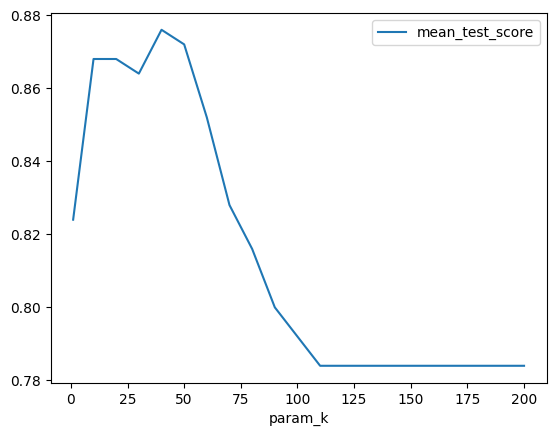

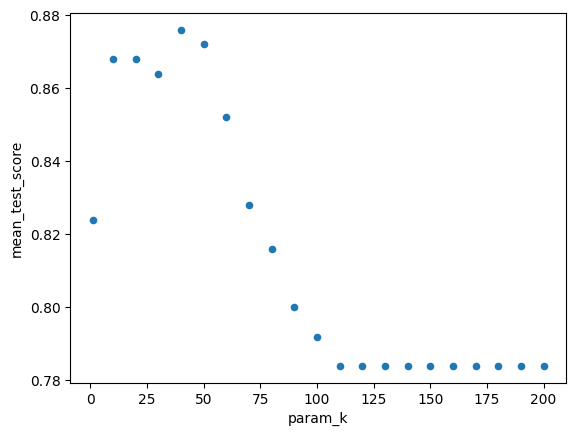

In [72]:
from sklearn.model_selection import GridSearchCV

sweep['labels'] = sweep['labels'].astype(int)
k_vals = np.arange(0, 201, step=10)
k_vals[0] = k_vals[0] + 1
param_grid = {'k': k_vals}
clf = GridSearchCV(KNN_kev(), param_grid, scoring='accuracy', cv=10)
clf.fit(sweep[['x', 'y']].values, sweep[['labels']].values.astype(int))
stats = pd.DataFrame(clf.cv_results_)
stats.plot(kind='line', x='param_k', y='mean_test_score')
stats.plot(kind='scatter', x='param_k', y='mean_test_score')
clf.best_estimator_ 

## Mean and std calculation


In [73]:
clf.cv_results_.keys()
test_score = []

for key in clf.cv_results_.keys():
    if 'split' in key:
        test_score.append(clf.cv_results_[key])
test_score = np.array(test_score)
mean_scores = []
std_scores = []
for i in range(21):
    mean_scores.append(np.mean(test_score[:,i]))
    std_scores.append(np.std(test_score[:,i]))



print(f'Mean Scores: \n{mean_scores}\n')    
best_idx = np.argsort(mean_scores)[::-1]  
print(f'Top 5 indexes: {best_idx[0:5]}\n')
print(f'STD: \n{std_scores}')
        

Mean Scores: 
[0.8240000000000001, 0.868, 0.868, 0.8640000000000001, 0.876, 0.8720000000000001, 0.852, 0.8280000000000001, 0.8160000000000001, 0.8, 0.792, 0.784, 0.784, 0.784, 0.784, 0.784, 0.784, 0.784, 0.784, 0.784, 0.784]

Top 5 indexes: [4 5 1 2 3]

STD: 
[0.07838367176906169, 0.12006664815842909, 0.10740577265678039, 0.09156418513807676, 0.0747261667690776, 0.068818602136341, 0.08588364221433555, 0.09474175425861608, 0.10910545357588686, 0.10583005244258363, 0.10552724766618335, 0.09499473669630334, 0.09499473669630334, 0.09499473669630334, 0.09499473669630334, 0.09499473669630334, 0.09499473669630334, 0.09499473669630334, 0.09499473669630334, 0.09499473669630334, 0.09499473669630334]


<AxesSubplot:title={'center':'Accuracy score with error bars vs. k value'}, xlabel='k neighbors', ylabel='accuracy score'>

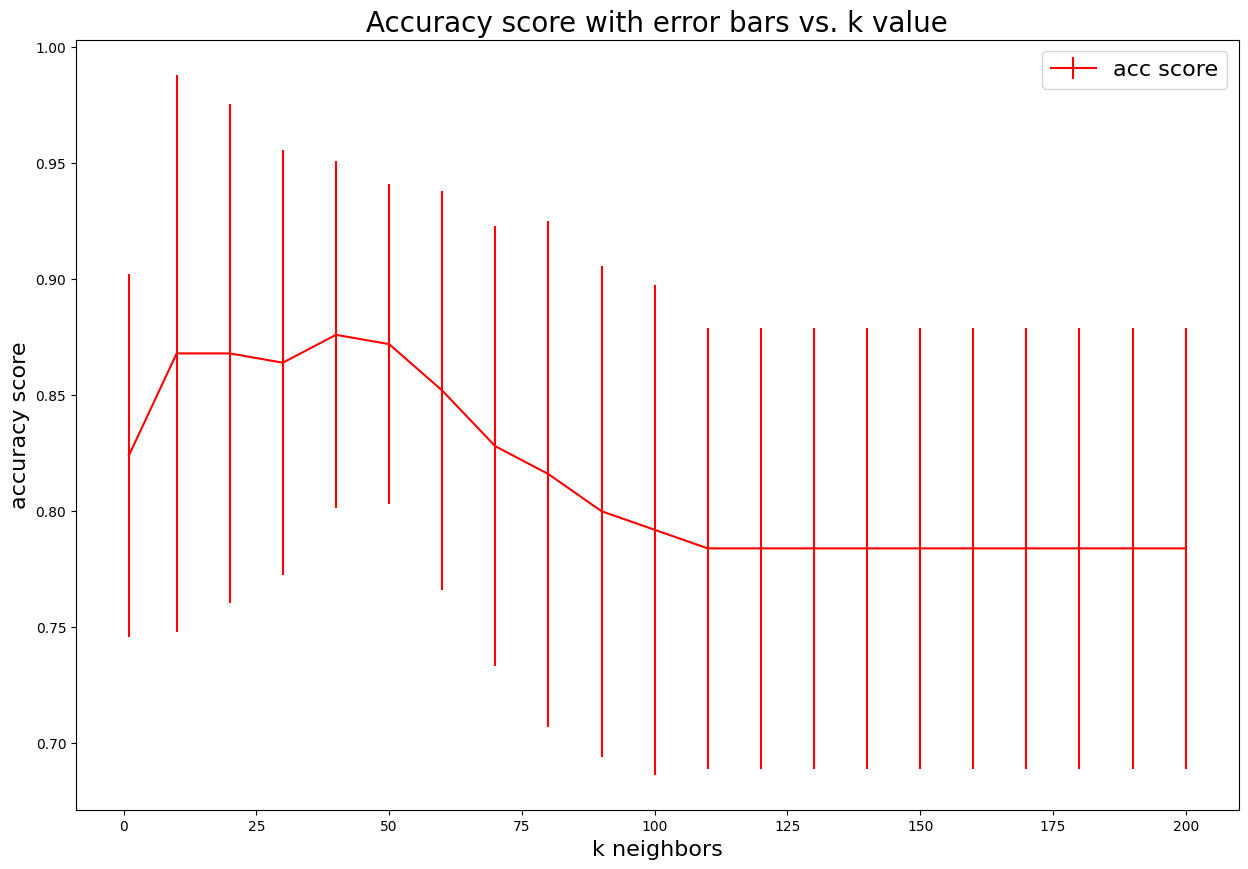

In [74]:
fig, ax = plt.subplots(figsize=(15, 10))


ax.errorbar(x= k_vals, y= clf.cv_results_['mean_test_score'],yerr=clf.cv_results_['std_test_score'],color='red', label = 'acc score')
make_pretty(ax, "Accuracy score with error bars vs. k value", 'k neighbors', 'accuracy score')